In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick as yb

from yellowbrick.features.rankd import Rank1D, Rank2D 
from yellowbrick.features.radviz import RadViz 
from yellowbrick.features.pcoords import ParallelCoordinates 
from yellowbrick.features.jointplot import JointPlotVisualizer
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.scatter import ScatterVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score




In [125]:
%matplotlib inline


In [40]:
data = pd.read_csv("data/forest_fires_clean.csv")
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


###### Data Types

In [41]:
data.dtypes

X              int64
Y              int64
FFMC         float64
DMC          float64
DC           float64
ISI          float64
temp         float64
RH             int64
wind         float64
rain         float64
area         float64
month_apr      int64
month_aug      int64
month_dec      int64
month_feb      int64
month_jan      int64
month_jul      int64
month_jun      int64
month_mar      int64
month_may      int64
month_nov      int64
month_oct      int64
month_sep      int64
day_fri        int64
day_mon        int64
day_sat        int64
day_sun        int64
day_thu        int64
day_tue        int64
day_wed        int64
dtype: object

###### Description

In [44]:
data.describe()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.001934,0.029014,0.332689,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.043980,0.168007,0.471632,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Data Types

In [425]:
data.dtypes

X              int64
Y              int64
FFMC         float64
DMC          float64
DC           float64
ISI          float64
temp         float64
RH             int64
wind         float64
rain         float64
area         float64
month_apr      int64
month_aug      int64
month_dec      int64
month_feb      int64
month_jan      int64
month_jul      int64
month_jun      int64
month_mar      int64
month_may      int64
month_nov      int64
month_oct      int64
month_sep      int64
day_fri        int64
day_mon        int64
day_sat        int64
day_sun        int64
day_thu        int64
day_tue        int64
day_wed        int64
dtype: object

###### Checking for null values

In [228]:
data.isnull().values.any()

False

In [229]:
data[data.columns[:]].isnull().sum()

X            0
Y            0
FFMC         0
DMC          0
DC           0
ISI          0
temp         0
RH           0
wind         0
rain         0
area         0
month_apr    0
month_aug    0
month_dec    0
month_feb    0
month_jan    0
month_jul    0
month_jun    0
month_mar    0
month_may    0
month_nov    0
month_oct    0
month_sep    0
day_fri      0
day_mon      0
day_sat      0
day_sun      0
day_thu      0
day_tue      0
day_wed      0
dtype: int64

> No null values found. Life is good, perhaps!.

#### Feature Engineering

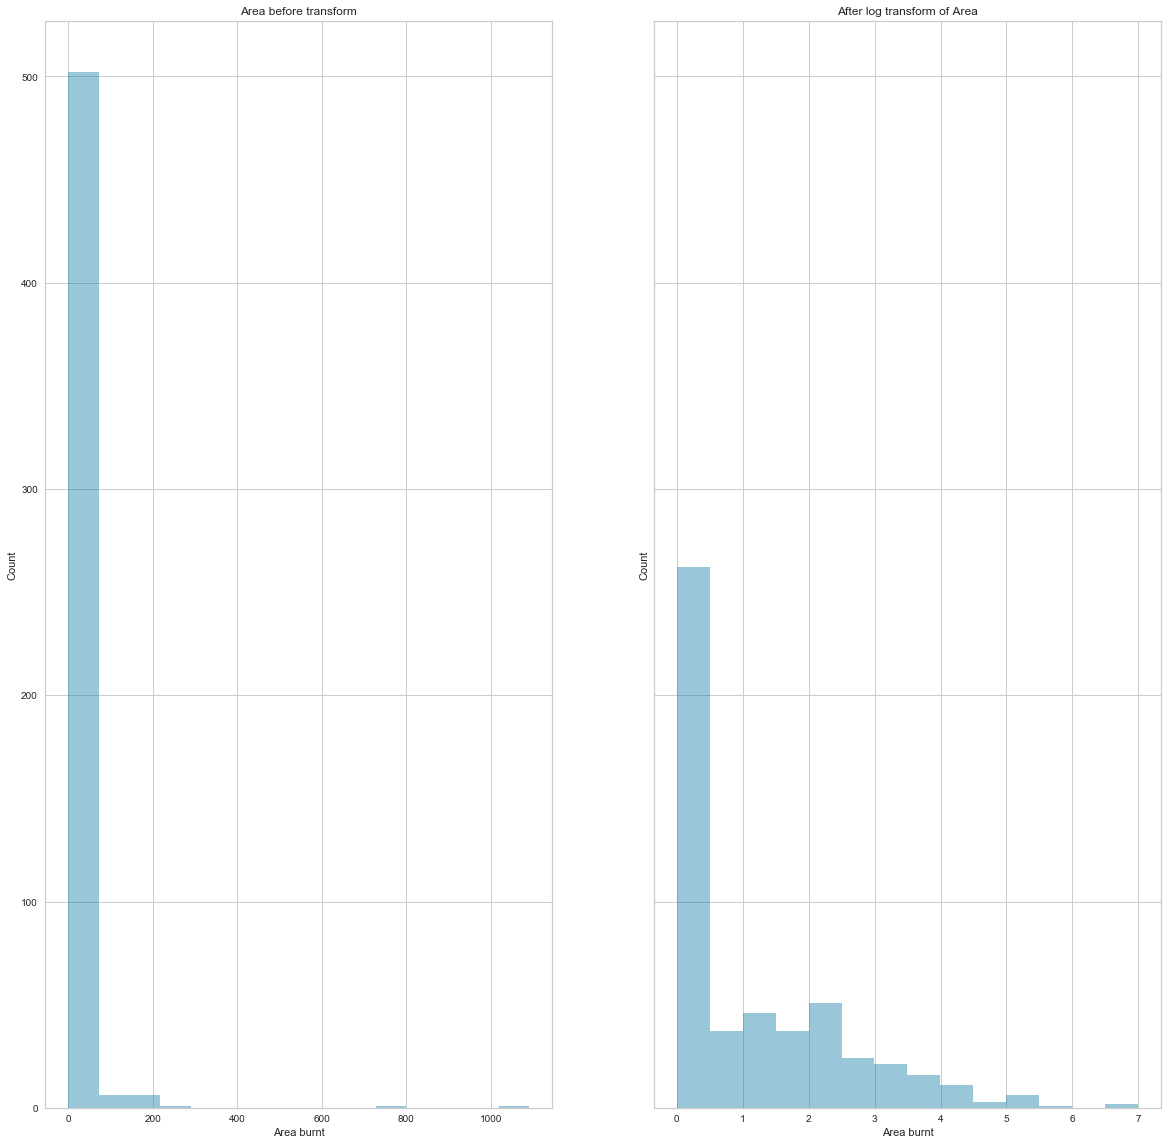

In [232]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(20, 20))

ax1 = sns.distplot(data["area"], kde= False, ax=ax1, bins = 15)
ax1.set(xlabel='Area burnt', ylabel='Count')
ax1.set_title("Area before transform")

ax2 = sns.distplot(np.log(data["area"]+1), kde= False,ax=ax2)
ax2.set(xlabel='Area burnt', ylabel='Count')
ax2.set_title("After log transform of Area")



In [284]:
area_index = [i for i in range(0, data.shape[1]) if (data.columns[i] == 'area')]
print(area_index)


[10]


In [306]:
data_numeric = data.iloc[:,0:11].values
data_dummy = data.iloc[:,11:].values

#### Standardizing - Does not make a difference. Gives me similar results with and without scaling.

In [327]:
stdsc = StandardScaler()
data_scaled_numeric=stdsc.fit_transform(data_numeric)
data_total = np.concatenate((data_scaled_numeric,data_dummy),axis =1)

#### Complete Dataframe

In [86]:
#data_total_frame = pd.DataFrame(data_total)
#data_total_frame.columns = data.columns
#data_total_frame.describe()
X = data.drop(['area'], axis=1)
y = np.log(data['area']+1)


#### Train Test and Valid Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1234)

#### Root mean square function

In [84]:
root_mean_squared_err = lambda y, yhat: np.sqrt(np.mean((y-yhat)**2))

#### Feature Selection 

##### Feature Selection using Ridge and RFE


In [120]:
from sklearn.linear_model import Ridge

model = Ridge()
rfe = RFE(model)
rfe.fit(X,y)
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Feature Ranking: ", rfe.ranking_) 
selected_feature_index = X.columns[rfe.support_]


Number of Features:  14
Selected Features:  [False False False False False False False False False  True False False
  True  True  True False  True  True  True  True  True  True  True False
  True False  True  True False]
Feature Ranking:  [ 4 14 11 13 15 10  8 16  2  1  5  6  1  1  1  7  1  1  1  1  1  1  1  9  1
  3  1  1 12]


In [162]:
alpha_val = list() 
for e in range(-1,6):
    alpha_val.append(10**e)  


#### Ridge Regression

In [163]:
train_error_ridge = []
test_error_ridge = []

for a in alpha_val:    
    model = Ridge(alpha=a)
    model.fit(X_train[selected_feature_index],y_train)
    train_error_ridge.append(root_mean_squared_err(y_train, model.predict(X_train[selected_feature_index])))
    test_error_ridge.append(root_mean_squared_err(y_test, model.predict(X_test[selected_feature_index])))

print(train_error_ridge)
print()
print(test_error_ridge)    

[1.4000925725575741, 1.4001092995947135, 1.4008457580760558, 1.4083825108458834, 1.4162988912427772, 1.41982288107305, 1.4215119636001996]

[1.3329884738618607, 1.3322674740732074, 1.3274854848970785, 1.3194886312608296, 1.3208728808620869, 1.3243654904642037, 1.324017346842006]


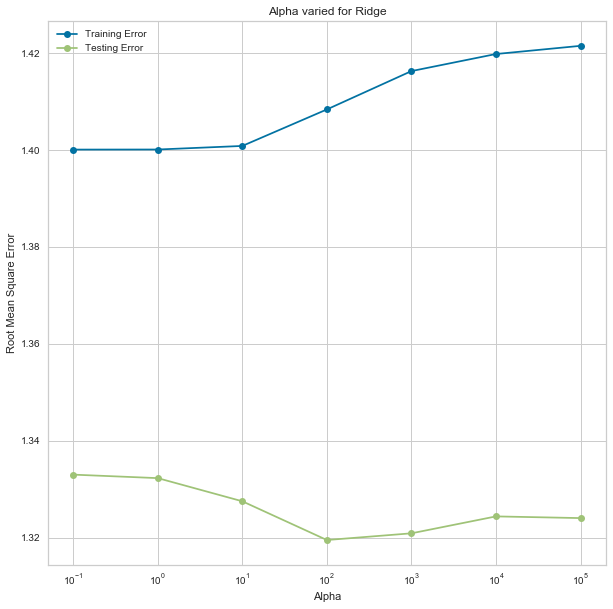

In [164]:
fig = plt.figure(figsize=(10,10))
plt.title('Alpha varied for Ridge')
plt.xscale('log',basex= 10)
plt.plot(alpha_val,train_error_ridge,"-o", label = 'Training Error')
plt.plot(alpha_val,test_error_ridge,"-o", label = 'Testing Error')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Root Mean Square Error')
fig.savefig('data/RidgeGraph.jpeg')
    


#### Lasso Regression - Feature Selection

In [165]:
from sklearn import linear_model
     
model = linear_model.Lasso()
rfe = RFE(model)
rfe.fit(X,y)
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Feature Ranking: ", rfe.ranking_) 
selected_feature_index = X.columns[rfe.support_]

Number of Features:  14
Selected Features:  [False False False  True  True False False  True  True  True  True False
 False False False False False False False False False  True  True  True
  True  True  True  True  True]
Feature Ranking:  [16 15 14  1  1  3  2  1  1  1  1  5  7  9 11 13 12 10  8  6  4  1  1  1  1
  1  1  1  1]


#### Lasso Regression

In [167]:
train_error_lasso = []
test_error_lasso = []

for a in alpha_val:    
    clf = linear_model.Lasso(alpha=a)
    clf.fit(X_train[selected_feature_index],y_train)
    train_error_lasso.append(root_mean_squared_err(y_train, clf.predict(X_train[selected_feature_index])))
    test_error_lasso.append(root_mean_squared_err(y_test, clf.predict(X_test[selected_feature_index])))

print(train_error_lasso)
print()
print(test_error_lasso)    

[1.4179005464621426, 1.4222774134423313, 1.4257010826027388, 1.430162028186774, 1.430162028186774, 1.430162028186774, 1.430162028186774]

[1.3210926856217904, 1.3235244755130762, 1.3217828011824515, 1.3210431124123754, 1.3210431124123754, 1.3210431124123754, 1.3210431124123754]


#### Graph of Lasso - MSE

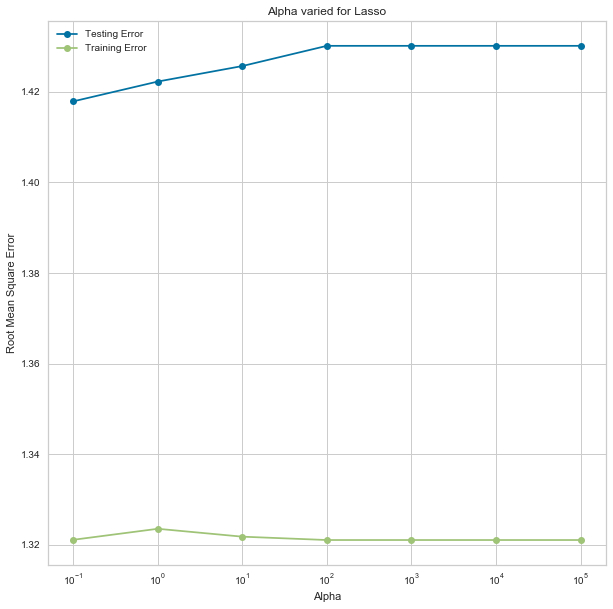

In [168]:
fig = plt.figure(figsize=(10,10))
plt.title('Alpha varied for Lasso')
plt.xscale('log',basex= 10)
plt.plot(alpha_val,train_error_lasso,"-o", label = 'Testing Error')
plt.plot(alpha_val,test_error_lasso,"-o", label = 'Training Error')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Root Mean Square Error')
fig.savefig('data/LassoGraph.jpeg')
    


###### Random Forest Regressor

In [172]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
rfe = RFE(model)
rfe.fit(X,y)
print("Number of Features: ", rfe.n_features_)
print("Selected Features: ", rfe.support_)
print("Feature Ranking: ", rfe.ranking_) 
selected_feature_index = X.columns[rfe.support_]

Number of Features:  14
Selected Features:  [ True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False  True False False
  True  True False  True  True]
Feature Ranking:  [ 1  1  1  1  1  1  1  1  1 13 15  5  9 11 14  7 10  8  4 16 12  1  3  6  1
  1  2  1  1]


In [173]:
train_error_rf = []
test_error_rf = []
md = list() 
for e in range(0,10):
    md.append(2**e)  

for d in md:    
    clf = RandomForestRegressor(max_depth=d)
    clf.fit(X_train[selected_feature_index],y_train)
    train_error_rf.append(root_mean_squared_err(y_train, clf.predict(X_train[selected_feature_index])))
    test_error_rf.append(root_mean_squared_err(y_test, clf.predict(X_test[selected_feature_index])))
   
    
print(train_error_rf)
print()
print(test_error_rf)   

[1.4024476376441464, 1.3651620040155172, 1.2583080778728901, 0.9642287956122525, 0.68045662747013325, 0.6712001673063821, 0.65758431038620579, 0.66970018319418101, 0.70747192700488515, 0.69020338423073102]

[1.3142887625008288, 1.322764674841614, 1.3497633684919286, 1.3319695747030604, 1.4523489185527041, 1.456912356911976, 1.312095265152482, 1.3761922603946097, 1.3745937659755381, 1.3963414344747009]


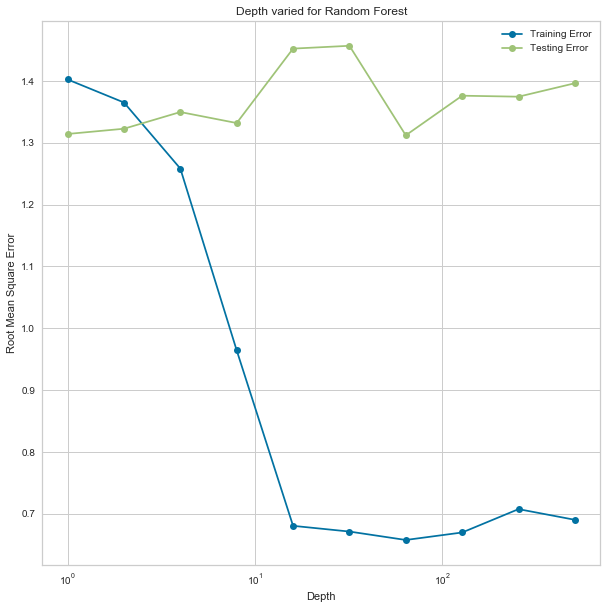

In [174]:
fig = plt.figure(figsize=(10,10))
plt.title('Depth varied for Random Forest')
plt.xscale('log',basex= 10)
plt.plot(md,train_error_rf,"-o", label = 'Training Error')
plt.plot(md,test_error_rf,"-o", label = 'Testing Error')
plt.legend()
plt.xlabel('Depth')
plt.ylabel('Root Mean Square Error')
fig.savefig('data/Graph.jpeg')
    
